# Milestone 1 Phase 1
Nama: Judan Syamsul Hadad

Batch: FTDS-009

## 1. Perkenalan

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset yang digunakan pada notebook ini dapat diunduh [disini](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip) dengan nama file **bank-additional.csv**. Dataset ini merupakan data marketing campaign dari suatu insititusi perbankan di Portugal. Keterangan dataset sebagaimana dikutip dari sumber data adalah sebagai berikut:
#### Bank Client Data:
1. **age** (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default**: has credit in default? (categorical: 'no','yes','unknown')
6. **housing**: has housing loan? (categorical: 'no','yes','unknown')
7. **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### Related with the Last contact of the Current Campaign:

8. **contact**: contact communication type (categorical: 'cellular','telephone')
9. **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **duration**: last contact duration, in seconds (numeric). ```Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.```

#### Other Attributes:

12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign ```(numeric; 999 means client was not previously contacted)```
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and Economic Context Attributes:

16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

#### Output Variable (Desired Target):

21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

### 1.1. Objective
Pada notebook ini akan dilakukan pembuatan model klasifikasi dengan tahapan berikut:
1. Exploratory Data Analysis (EDA)
    - Cardinality
2. Data preprocessing yang mencakup:
    - Splitting:
        - Dataset ke inference set dan train-test set
        - Train-test set ke train set dan test set
    - Handling outliers pada train set
    - Handling missing values pada train set
    - Feature engineering (selection, scaling, encoding)
3. Model definition:
    - Logistic regression
    - Support vector classification
    - Decision tree
    - Random forest
    - K-nearest neighbor
    - Naive bayes
    - Adaboost
4. Model training
    - Cross validation
5. Model evaluation
    - Pilih satu model terbaik berdasarkan cross validation
    - Hyperparameter tuning pada model terbaik
    - Evaluasi fit terhadap test set
6. Model inference

### 1.2. Problem Statement
Model mana yang paling baik untuk memprediksi apakah seorang client akan mendaftar deposit atau tidak?

## 2. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#validation and evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

## 3. Data Loading

Definisikan random state untuk seluruh kode di notebook ini.

In [2]:
random_state = 34

Set display agar menampilkan seluruh kolom.

In [3]:
pd.set_option('display.max_columns', None)

Load dataset.

In [4]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

Copy dataset.

In [5]:
df = data.copy()

Cek lima data teratas.

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Cek jumlah non-missing value dan tipe data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Terdapat 41188 baris dan 21 kolom pada dataset. Tidak ada missing value yang terdeteksi otomatis pada dataset.

Cek missing value pada dataset.

In [8]:
df.isnull().sum().sum()

0

Pengecekan missing value lebih lanjut akan dilakukan di Bab Data Preprocessing.

Mapping value `Yes` menjadi 1 dan `No` menjadi 0 pada kolom di kolom `y` ke kolom `y-num`.

Ubah tipe data `object` menjadi `category` untuk mengurangi penggunaan memory.

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

Pada keterangan dataset terdapat informasi bahwa data yang tidak diketahui *outcome*-nya diisi dengan `unknown`. Pada kasus kali ini, `unknown` tidak akan dianggap sebagai missing value, tetapi bagian dari model dimana prediksi tetap harus dibuat dengan kondisi data-data tersebut bernilai `unknown`.

Cek jumlah nilai unik di masing-masing kolom.

In [10]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Tidak ada kolom yang berfungsi sebagai primary key pada dataset ini. Pada kolom `month` hanya terdapat 10 unique value, berarti ada dua bulan yang tidak termasuk pada dataset ini.

In [11]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

Bulan Januari dan Februari tidak termasuk di dalam dataset.

Cek statistika deskriptif dari dataset.

In [12]:
df.describe(include='all').T.drop(columns='count').sort_values(by='mean', ascending=False)

,unique,top,freq,mean,std,min,25%,50%,75%,max
nr.employed,NaN,NaN,NaN,5167.035911,72.251528,4963.6,5099.1,5191.0,5228.1,5228.1
pdays,NaN,NaN,NaN,962.475454,186.910907,0.0,999.0,999.0,999.0,999.0
duration,NaN,NaN,NaN,258.28501,259.279249,0.0,102.0,180.0,319.0,4918.0
cons.price.idx,NaN,NaN,NaN,93.575664,0.57884,92.201,93.075,93.749,93.994,94.767
age,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
euribor3m,NaN,NaN,NaN,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
campaign,NaN,NaN,NaN,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
previous,NaN,NaN,NaN,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0
emp.var.rate,NaN,NaN,NaN,0.081886,1.57096,-3.4,-1.8,1.1,1.4,1.4
cons.conf.idx,NaN,NaN,NaN,-40.5026,4.628198,-50.8,-42.7,-41.8,-36.4,-26.9


Berikut beberapa hal yang dapat diketahui dari dataset berdasarkan statistika deskriptif:
- `age`: nilai min dan max terpaut cukup jauh antara 17 dan 98 tahun, sedangkan rata-ratanya hanya 40 tahun dengan standar deviasi 10 tahun
- `campaign`: rata-rata bernilai 2.56, berarti tiap orang setidaknya dihubungi 2-3 kali, tetapi ada yang dihubungi sampai 56 kali
- `previous`: rata-rata bernilai 0.17, hampir semua orang tidak pernah dihubungi sebelumnya, tetapi ada yang pernah dihubungi sebanyak 7 kali
- `job`: terdapat 12 kategori dengan jumlah terbanyak adalah `admin`
- `marital`: terdapat 4 kategori dengan mayoritas berstatus `married`
- `y`: mayoritas memilih `no` (tidak membuat deposit), menandakan bahwa target pada dataset ini imbalance

Selanjutnya cek apakah ada duplikat.

In [13]:
df.duplicated().sum()

12

Terdapat 12 data duplikat, yaitu:

In [14]:
df.loc[df[df.duplicated()==True].index]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Deklarasikan kolom dengan data kategorik dan kolom dengan data numerik untuk digunakan untuk pengolahan pada bab-bab berikutnya.

In [15]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

Cek kolom data kategorik.

In [16]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Cek kolom data numerik.

In [17]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

## 4. Exploratory Data Analysis (EDA)

Cek persentase value data pada target.

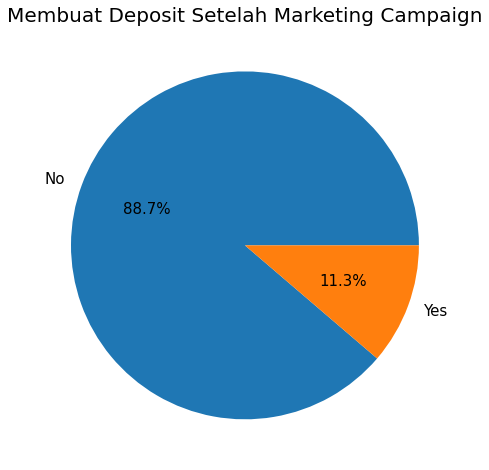

In [18]:
plt.figure(figsize=(8,8))
plt.pie(df['y'].value_counts().values.tolist(), labels=['No','Yes'], autopct='%1.1f%%',textprops={'fontsize': 15})
plt.title('Membuat Deposit Setelah Marketing Campaign', fontsize=20)
plt.show()

Seperti yang telah diperkirakan pada Bab Data Loading, target yang dimiliki imbalance dengan rasio 8:1 antara `No` dan `Yes`.

### 4.1. Numerical Feature

Cek korelasi antar feature numerikal pada dataset.

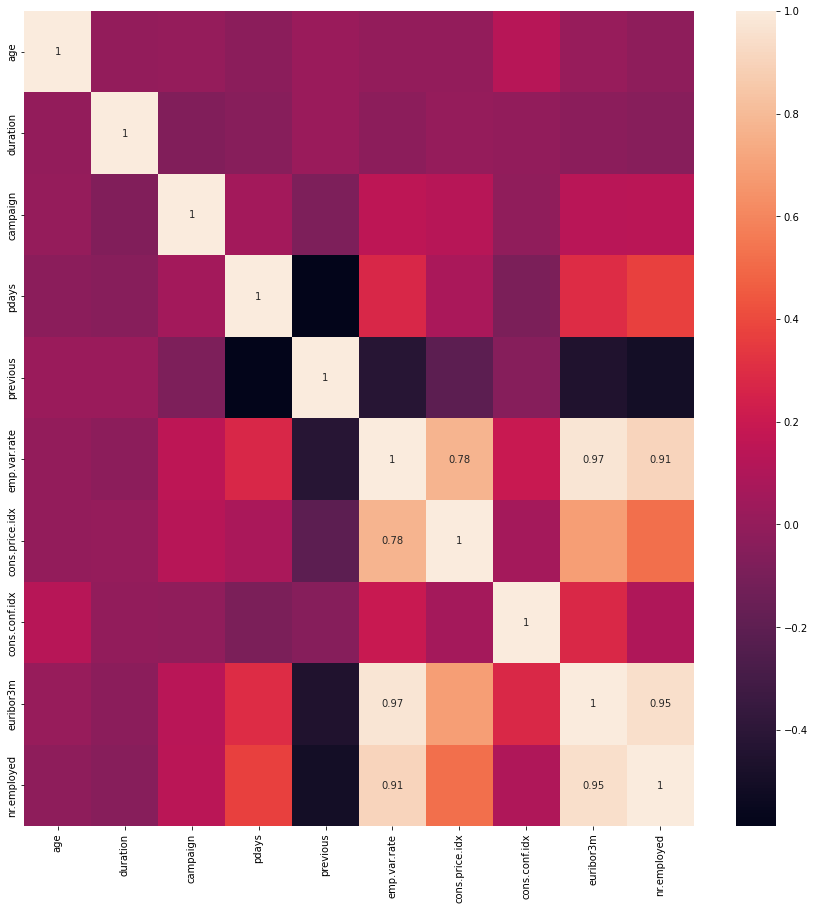

In [19]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Pada kasus ini, feature yang memiliki korelasi kuat diasumsikan memiliki nilai korelasi Pearson lebih dari 0.7 atau kurang dari -0.7. Ada beberapa feature yang memiliki korelasi yang kuat, yaitu `emp.var.rate`, `cons.price.idx`, `euribor3m`, dan `nr.employed`. Feature ini nantinya bisa diwakilkan dengan `emp.var.rate` saja setelah pengecekan ulang pada train set.

### 4.2. Categorical Feature

Selanjutnya eksplorasi kemungkinan korelasi target terhadap feature kategorik. Fungsi berikut merupakan fungsi umum yang digunakan. Buat kolom dummy tambahan untuk plotting.

In [20]:
#kolom dummy
df['y-num'] = df['y'].replace(to_replace = dict(yes = 1, no = 0)).astype('float64')

#function untuk plotting feature kategorik
def cat_plot(dataframe, feature):
    #grouping dataframe berdasarkan kolom feature
    feature_count = dataframe[[feature,'y','y-num']].groupby([feature,'y']).count().sort_values(by=['y','y-num'],ascending=False).reset_index()
    feature_chance = df[[feature,'y-num']].groupby(feature).mean().sort_values(by='y-num',ascending=False).reset_index()

    #plotting jumlah
    fig,ax = plt.subplots(1,2, figsize=(20,10))
    ax[0] = plt.subplot(1,2,1)
    ax[0] = sns.barplot(x=feature,y='y-num',data=feature_count,hue='y')
    ax[0].set_title('Jumlah Klien Berdasarkan Keputusan Deposit')
    ax[0] = plt.xticks(rotation=90)

    #plotting rata-rata y atau peluang suatu feature untuk positif y
    ax[1] = plt.subplot(1,2,2)
    ax[1] = plt.bar(x=feature_chance[feature], height=feature_chance['y-num'])
    ax[1] = plt.xticks(rotation=90)
    ax[1] = plt.title('Kemungkinan Deposit Setelah Marketing Campaign')
    plt.show()

Cek respon marketing campaign ini terhadap jenis pekerjaan client.

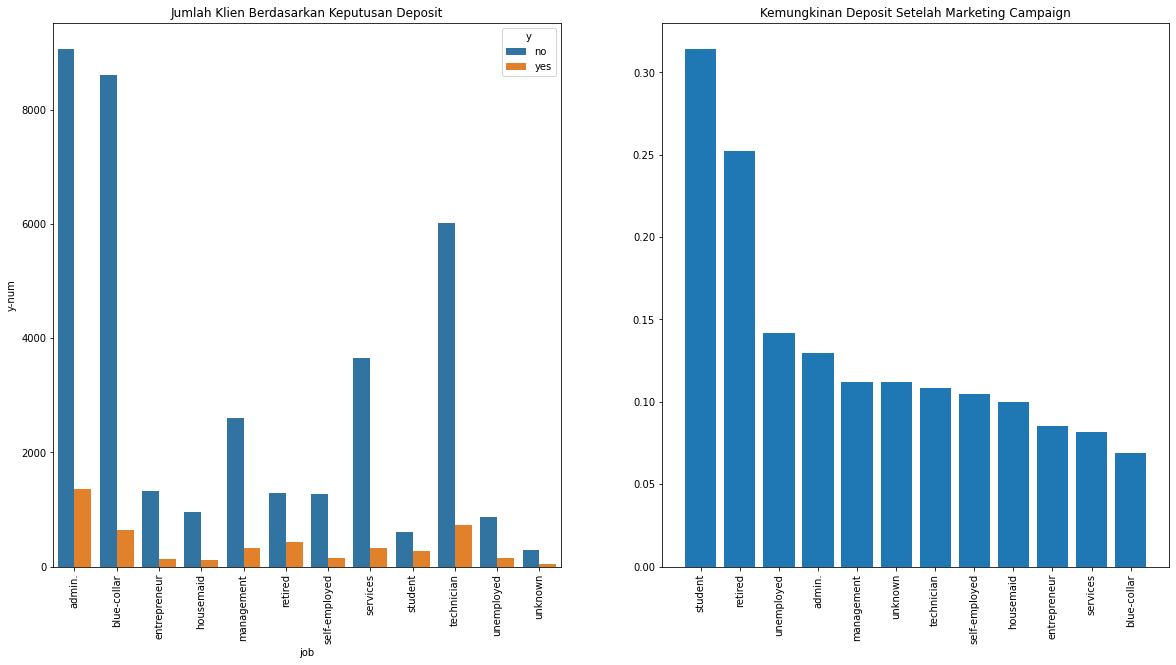

In [21]:
cat_plot(df,'job')

Dari grafik dapat diketahui bahwa jenis pekerjaan client yang paling banyak dihubungi adalah `admin`, `blue-collar`, dan `technician`, tetapi ketiga pekerjaan ini justru tidak termasuk ke dalam tiga pekerjaan dengan kemungkinan membuat deposit tertinggi. Pekerjaan dengan kemungkinan membuat deposit tertinggi adalah `student`, `retired`, dan `unemployed`.

Artificial ordinality bisa dibuat berdasarkan kemungkinan suatu pekerjaan untuk membuat deposit dengan urutan sebagai berikut:

    'blue-collar':0,
    'services':1,
    'enterpreneur':2,
    'housemaid':3,
    'self-employed':4,
    'technician':5,
    'unknown':6,
    'management':7,
    'admin.':8,
    'unemployed':9,
    'retired':10,
    'student':11

Selanjutnya coba lihat client berdasarkan tingkat pendidikan.

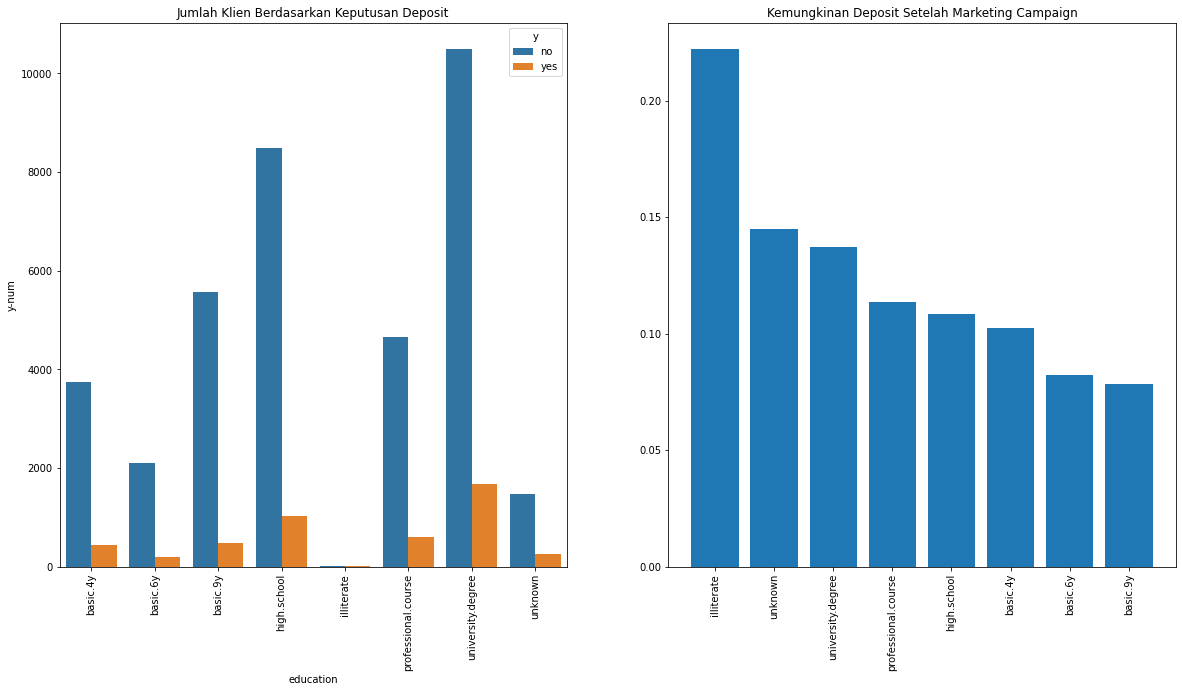

In [22]:
cat_plot(df,'education')

Dari grafik dapat diketahui bahwa client yang paling banyak dihubungi berdasarkan tingkat pendidikan adalah `university.degree`, `high.school`, dan `basic.9y`. Client dengan tingkat pendidikan `illiterate`, `unknown`, dan `university.degree` memiliki kemungkinan membuat deposit tertinggi.

Artificial ordinality bisa dibuat berdasarkan kemungkinan tingkat pendidikan client untuk membuat deposit dengan urutan sebagai berikut:

    'basic.9y':0,
    'basic.6y':1,
    'basic.4y':2,
    'high.school':3,
    'professional.course':4,
    'university.degree':5,
    'unknown':6,
    'illiterate':7

In [23]:
df[cat_cols].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

Cek respon marketing campaign ini terhadap bulan client dihubungi.

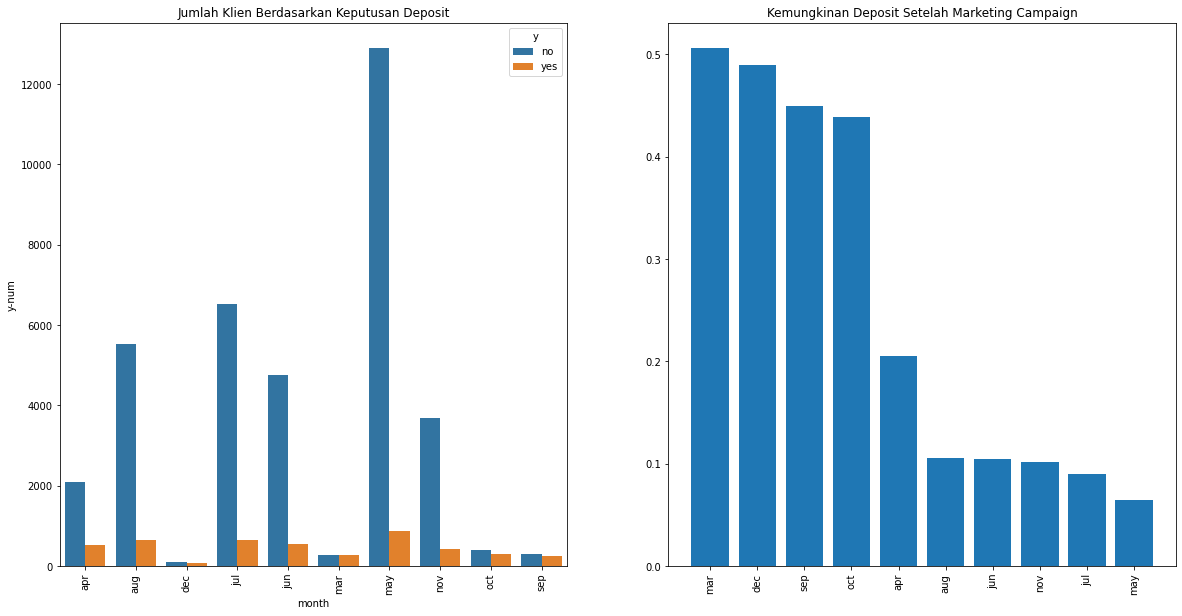

In [24]:
cat_plot(df,'month')

Dari grafik dapat diketahui bahwa client paling banyak dihubungi pada bulan `may`, sedangkan berdasarkan kemungkinan untuk membuat depositnya paling tinggi adalah `mar`.

Artificial ordinality bisa dibuat berdasarkan bulan dihubunginya client dengan urutan sebagai berikut:

    'may':0,
    'jul':1,
    'nov':2,
    'jun':3,
    'aug':4,
    'apr':5,
    'oct':6,
    'sep':7,
    'dec':8,
    'mar':9

### Cardinality

Kita perlu pastikan bahwa data yang kita gunakan tidak memiliki cardinality tinggi ataupun memiliki cardinality sama dengan satu.

In [25]:
df[cat_cols].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

Tidak ada feature kategorik dengan cardinality yang tinggi ataupun cardinality sama dengan satu. Pastikan jumlah unique value pada setiap feature kategorik.

In [26]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts(),'\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact
cellular     26144
telephone    15044
Nam

Ada beberapa feature yang memiliki unique value dengan jumlah yang sangat rendah, yaitu `marital`, `education`, dan `default`.

In [27]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [28]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [29]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

`marital` dan `education` bisa dijadikan parameter stratify saat splitting dataset.

## 5. Data Preprocessing
Pada bab ini akan dilakukan pengolahan data sebelum digunakan untuk model.

Drop duplikat dari model terlebih dahulu. Duplikat ini di-drop karena dari keseluruhan feature, semua nilainya sama sehingga bisa diasumsikan bahwa data duplikat tersebut merupakan data independent yang memang kebetulan memiliki nilai sama.

In [30]:
df.drop(index=df[df.duplicated()==True].index, inplace=True)

### 5.1. Data Splitting

Tahap berikutnya adalah membagi data menjadi inference, train, validation, dan test set.

Ambil data untuk inferensial dan hapus data tersebut dari dataset yang akan dipisahkan menjadi train dan test set.

In [31]:
#data inference
df_inf = df.dropna().sample(3, random_state=random_state)
df_tt = df.drop(index=df_inf.index)
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y-num
1260,48,technician,married,professional.course,unknown,yes,no,telephone,may,thu,306,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.0
9721,60,retired,divorced,basic.4y,unknown,yes,no,telephone,jun,mon,253,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no,0.0
40943,35,admin.,married,university.degree,no,no,no,cellular,oct,wed,194,1,3,2,success,-1.1,94.601,-49.5,0.985,4963.6,yes,1.0


Deklarasikan feature dan target.

In [32]:
#deklarasi feature dan target
X = df_tt[num_cols+cat_cols]
y = df_tt['y-num']

Bagi data menjadi X (feature) dan y (target) untuk masing-masing train dan test set. Sample test set yang diambil sebanyak 20% dari total data pada dataset.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random_state,stratify=pd.concat([X['default'],y],axis=1))

Pastikan jumlah unique value antara train dan test set agar tidak ada kategori yang hilang dari kedua set.

In [34]:
X_train[cat_cols].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [35]:
X_test[cat_cols].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

Jumlah nilai kategorik sudah sama.

### 5.2. Outliers Handling

Pisahkan feature kategorik dan feature numerik.

In [36]:
X_train_cat = X_train[cat_cols]
X_train_num = X_train[num_cols]

Buat fungsi untuk deteksi outlier.

In [37]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

Cek outlier pada setiap feature numerik.

In [38]:
#variable untuk summary
distribution = []
skewness = []
upper_limit = []
lower_limit = []
outliers_percent = []
max = []
min = []

#loop untuk summary outlier
for column in X_train_num.columns:

    #cek skewness
    col_skewness = X_train_num[column].skew()

    #conditional berdasarkan skewnewss
    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        col_distribution = 'Normal'
        col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      
    else:
        col_distribution = 'Skewed'
        col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
    #cek min,max, dan jumlah outlier
    col_max = X_train_num[column].max()
    col_min = X_train_num[column].min()
    col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
    #update summary per loop
    distribution.append(col_distribution)
    skewness.append(col_skewness)
    upper_limit.append(col_upper_limit)
    max.append(col_max)
    min.append(col_min)
    lower_limit.append(col_lower_limit)
    outliers_percent.append(col_outliers_percent)

#df summary
outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'upper_limit':upper_limit, 'lower_limit':lower_limit, 'max':max, 'min':min , 'outliers_percent':outliers_percent}
outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
outliers_summary

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
previous,Skewed,3.82,0.0,0.0,7.0,0.0,13.72
duration,Skewed,3.21,644.5,-223.5,4918.0,0.0,7.20
campaign,Skewed,4.59,6.0,-2.0,43.0,1.0,5.77
pdays,Skewed,-4.90,999.0,999.0,999.0,0.0,3.71
age,Skewed,0.80,69.5,9.5,98.0,17.0,1.17


Outlier pada `campaign` akan di-cap dengan metode IQR, sedangkan outlier pada `age` akan di-trim.

Bagaimana dengan `previous`, `duration`, dan `pdays`?

Berdasarkan keterangan dataset, `duration` dapat di-drop karena sangat berpengaruh terhadap target. Hal ini disebabkan jika `duration` bernilai 0, maka otomatis client dianggap menolak untuk membuka deposit.

Sedangkan pada `previous` dan `pdays`, jika dilihat pada upper dan lower limit-nya, data ini menjadi bernilai cardinality 1 sehingga bisa kita drop saja dari feature.

In [39]:
#capping campaign
winsorizer_skewed = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['campaign'])
X_train = winsorizer_skewed.fit_transform(X_train)

In [40]:
#trimming age
trimmer = OutlierTrimmer(capping_method='iqr',tail='both',fold=1.5,variables=['age'])
X_train = trimmer.fit_transform(X_train)
y_train = y_train.loc[X_train.index]

### 5.4. Missing Values Detection

Tidak ada missing value pada keseluruhan dataset ini.

In [41]:
df.isnull().sum().sum()

0

### 5.5. Feature Engineering

Pada EDA kita sudah mengetahui bahwa `emp.var.rate`, `cons.price.idx`, `euribor3m`, dan `nr.employed` memiliki hubungan antar variabel yang kuat. Kumpulan feature ini akan diwakilkan dengan `emp.var.rate` saja. Pastikan kembali korelasinya dengan heatmap.

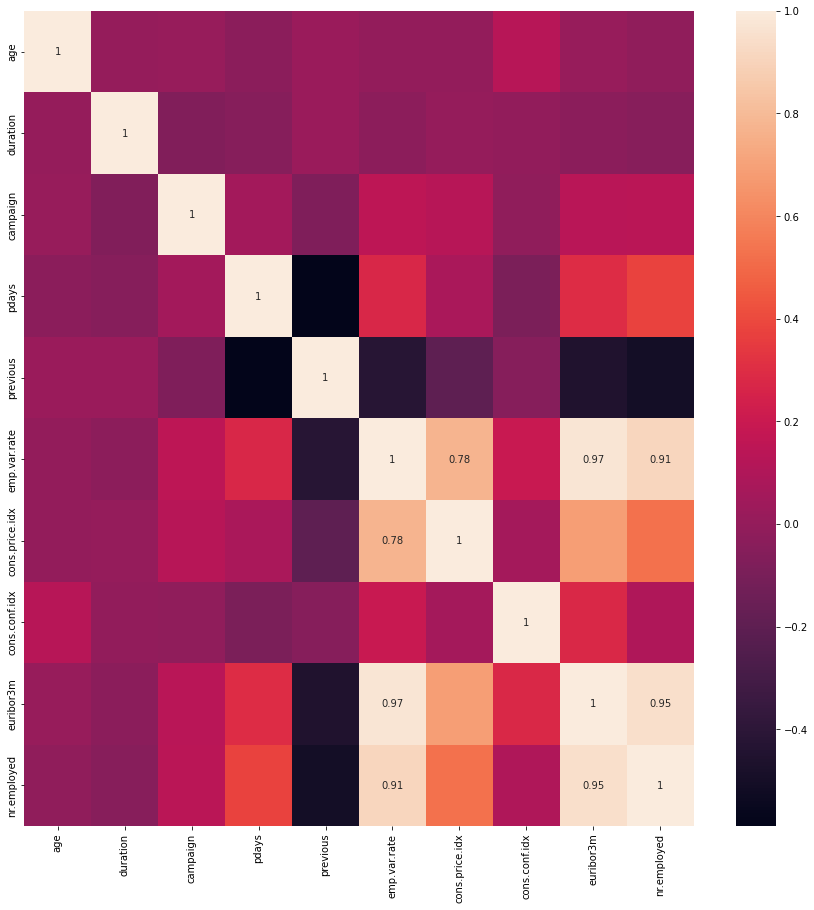

In [42]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(X_train_num.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Feature numerik yang tersisa adalah `age`, `campaign`, `emp.var.rate`, dan `cons.conf.idx`.

In [43]:
num_cols = ['age', 'campaign', 'emp.var.rate', 'cons.conf.idx']

Feature kategorik yang digunakan adalah `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`,  dan `poutcome`.

Buat Column Transformer untuk feature-feature tersebut.

Numerik (Standard Scaler):
- `age`
- `campaign`
- `emp.var.rate`
- `cons.conf.idx`

Kategorik (Ordinal Encoder):
- `job`
- `education`
- `month`

Kategorik (One-Hot Encoder):
- `marital`
- `default`
- `housing`
- `loan`
- `contact`
- `day_of_week`
- `poutcome`

In [44]:
ohe_cols = ['marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']

In [45]:
#ordinal encoder untuk masing-masing feature ordinal
job_ordenc = OrdinalEncoder(categories=[['blue-collar','services','entrepreneur','housemaid','self-employed',
                                        'technician','unknown','management','admin.','unemployed','retired','student']])

edu_ordenc = OrdinalEncoder(categories=[['basic.9y','basic.6y','basic.4y','high.school','professional.course',
                                        'university.degree','unknown','illiterate']])

month_ordenc = OrdinalEncoder(categories=[['may','jul','nov','jun','aug','apr','oct','sep','dec','mar']])

In [46]:
#column transformer untuk semua feature yang dipilih
prepline = ColumnTransformer([
    ('stdscaler',StandardScaler(),num_cols),
    ('job',job_ordenc,['job']),
    ('education',edu_ordenc,['education']),
    ('month',month_ordenc,['month']),
    ('onehot',OneHotEncoder(),ohe_cols)
])

## 6. Model Definition

Pada bab ini akan ditentukan model yang digunakan dan hyperparameter yang akan di-tuning jika model tersebut terpilih berdasarkan `Cross Validation`.

Karena target-nya imbalance, maka scoring yang digunakan adalah `F1-weighted`.

### 6.1. Logistic Regression

Tuning parameter yang digunakan pada logistic regression adalah jenis penalti, C, dan tipe solver.

In [47]:
#base model
logreg = LogisticRegression(random_state=random_state,n_jobs=-1)

#pipeline
pipe_logreg = Pipeline([
    ('prep',prepline),
    ('logreg',logreg)
])

#hyperparameter tuner
params_logreg = {
    'logreg__penalty':['l1','l2','none','elasticnet'],
    'logreg__C':[0.01,0.1,1,10,100],
    'logreg__solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

### 6.2. Support Vector Classification

Tuning parameter yang digunakan pada SVC adalah C, jenis loss, dan penalti. Model SVC yang digunakan adalah derivat dari SVC berupa LinearSVC.

In [48]:
#base model
svc = SVC(random_state=random_state)

#pipeline
pipe_svc = Pipeline([
    ('prep',prepline),
    ('svc',svc)
])

#hyperparameter tuner
params_svc = {
    'svc__C':[0.01,0.1,1,10,100],
    'svc__loss':['hinge','squared_hinge'],
    'svc__penalty':['l1','l2']
}

### 6.3. Decision Tree

Tuning parameter yang digunakan pada decision tree adalah jenis splitter, max depth, min sample split, dan max feature.

In [49]:
#base model
dtree = DecisionTreeClassifier(random_state=random_state)

#pipeline
pipe_dtree = Pipeline([
    ('prep',prepline),
    ('dtree',dtree)
])

#hyperparameter tuner
params_dtree = {
    'dtree__splitter':['best','random'],
    'dtree__max_depth':np.arange(1,10),
    'dtree__min_samples_split':np.arange(2,10),
    'dtree__max_features':['None','sqrt','log2','auto']
}

### 6.4. Random Forest

Tuning parameter yang digunakan pada random forest adalah jumlah estimator/tree, max depth, min sample split, dan max feature.

In [50]:
#base model
rforest = RandomForestClassifier(random_state=random_state,n_jobs=-1)

#pipeline
pipe_rforest = Pipeline([
    ('prep',prepline),
    ('rforest',rforest)
])

#hyperparameter tuner
params_rforest = {
    'rforest__n_estimators':np.arange(10,100,20),
    'rforest__max_depth':np.arange(1,10),
    'rforest__min_samples_split':np.arange(2,10,2),
    'rforest__max_features':['None','sqrt','log2','auto']
}

### 6.5. K-Nearest Neighbors

Tuning parameter yang digunakan pada KNN adalah jumlah neighbor, faktor pembobotan untuk `neighbor`, dan algoritma yang digunakan untuk menghitung `neighbor` terdekat.

In [51]:
#base model
knn = KNeighborsClassifier(n_jobs=-1)

#pipeline
pipe_knn = Pipeline([
    ('prep',prepline),
    ('knn',knn)
])

#hyperparameter tuner
params_knn = {
    'knn__n_neighbors':np.arange(3,12,2),
    'knn__weights':['uniform','distance'],
    'knn__algorithm':['auto','ball_tree','kd_tree','brute']
}

### 6.6. Naive Bayes

Tuning parameter yang digunakan pada Naive Bayes adalah variance smoothing karena hyperparameter-nya hanya ini saja.

In [52]:
#base model
nb = GaussianNB()

#pipeline
pipe_nb = Pipeline([
    ('prep',prepline),
    ('nb',nb)
])

#hyperparameter tuner
params_nb = {
    'nb__var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]
}

### 6.7. AdaBoost

`AdaBoost` merupakan model tambahan yang dipilih pada notebook ini. Tuning parameter yang digunakan adalah jumlah estimator, learning rate, dan jenis algoritma.

In [53]:
#base model
adaboost = AdaBoostClassifier(random_state=random_state)

#pipeline
pipe_adaboost = Pipeline([
    ('prep',prepline),
    ('adaboost',adaboost)
])

#hyperparameter tuner
params_adaboost = {
    'adaboost__n_estimators':np.arange(10,100,10),
    'adaboost__learning_rate':[0.01,0.1,1,10,100],
    'adaboost__algorithm':['SAMME','SAMME.R']
}

## 7. Model Training

Pada bab ini akan dilakukan fitting terhadap train set menggunakan masing-masing base model yang telah didefinisikan lalu dilakukan cross validation. Hasil cross validation akan disimpan pada tabel `estimator summary`.

In [54]:
model = ['logistic_regression','support_vector_classification','decision_tree','random_forest','k_nearest_neighbors','naive_bayes','adaboost']
estimator = [pipe_logreg, pipe_svc, pipe_dtree, pipe_rforest, pipe_knn, pipe_nb, pipe_adaboost]

mean_score = []
stdev_score = []

for est in estimator:
    est.fit(X_train,y_train)
    scores = cross_val_score(est,X_train,y_train,scoring='f1_weighted',cv=5,n_jobs=-1)
    
    mean_score.append(np.mean(scores))
    stdev_score.append(np.std(scores))

estimator_summary = pd.DataFrame({'estimator':model,'mean_score':mean_score,'stdev_score':stdev_score})
estimator_summary.sort_values(by='mean_score',ascending=False,inplace=True)
estimator_summary.reset_index(drop=True, inplace=True)

## 8. Model Evaluation

### 8.1. Cross Validation Result

Berikut hasil dari cross validation di bab sebelumnya.

In [55]:
estimator_summary

,estimator,mean_score,stdev_score
0,random_forest,0.877643,0.003012
1,adaboost,0.877335,0.002585
2,support_vector_classification,0.874553,0.002062
3,logistic_regression,0.874398,0.001633
4,k_nearest_neighbors,0.869712,0.002541
5,decision_tree,0.845159,0.002677
6,naive_bayes,0.679319,0.018923


Dari hasil cross validation, diketahui bahwa model yang terbaik adalah model `Random Forest` diikuti oleh `AdaBoost`. Hal ini berdasarkan mean_score yang paling tinggi, tetapi jika mempertimbangkan stdev_score juga (lebih kecil lebih baik), maka secara subyektif akan dipilih `AdaBoost` untuk dilanjutkan dengan `Grid Search`.

### 8.2. Hyperparameter Tuning

Pengaruh parameter terhadap target pada masing-masing model akan divisualisasikan. Parameter terbaik dari grid search akan digunakan untuk memprediksi test set dan memastikan apakah model underfit, good fit, atau overfit.

Model yang akan di-tuning adalah `AdaBoost`.

In [56]:
grid_adaboost = GridSearchCV(
    pipe_adaboost, params_adaboost, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_adaboost = grid_adaboost.best_params_
best_pipe_adaboost = grid_adaboost.best_estimator_
df_result_adaboost = pd.DataFrame.from_dict(grid_adaboost.cv_results_,orient='columns')

Fitting 5 folds for each of 90 candidates, totalling 450 fits


Buat fungsi untuk visualisasi pengaruh parameter terhadap `F1 weighted` score dan visualisasi confusion matrix.

In [57]:
#fungsi plot pengaruh parameter
def param_plot(dataframe):
    #param pada model
    params = [col for col in dataframe.columns if 'param_' in col]
    
    
    fig,ax = plt.subplots(1,len(params), figsize=(len(params)*5,5))
    fig.suptitle('Pengaruh Params terhadap Mean F1 wt.Score')
    #initialize while loop
    i = 0
    
    #while loop untuk plot masing-masing param
    while i < len(params):
        ax[i] = plt.subplot(1,len(params),i+1)
        sns.lineplot(data=dataframe,x=params[i],y='mean_test_score',ax=ax[i])
        ax[i] = plt.xticks(rotation=45)
        i += 1
    plt.show()

In [58]:
#fungsi plot confusion matrix
def cf_graph(best_pipe,X,y):
    #confusion matrix
    cf_matrix = confusion_matrix(y, best_pipe.predict(X))

    #figure size
    sns.set(rc={'figure.figsize':(5,5)})

    #plotting confusion matrix
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={'size':20})
    ax.set_title('Confusion Matrix', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=15)
    ax.set_ylabel('Actual', fontsize=15)
    ax.set_xticklabels(["Tidak Deposit", "Deposit"], fontsize=15)
    ax.set_yticklabels(["Tidak Deposit", "Deposit"], fontsize=15)
    plt.show()

Parameter terbaik yang dihasilkan adalah sebagai berikut:

In [59]:
print(best_params_adaboost)

{'adaboost__algorithm': 'SAMME.R', 'adaboost__learning_rate': 1, 'adaboost__n_estimators': 90}


In [60]:
df_result_adaboost[df_result_adaboost['params']==best_params_adaboost]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_adaboost__algorithm,param_adaboost__learning_rate,param_adaboost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
71,3.856978,0.567354,0.240342,0.105697,SAMME.R,1,90,"{'adaboost__algorithm': 'SAMME.R', 'adaboost__...",0.876808,0.880465,0.880918,0.878356,0.875528,0.878415,0.002068,1


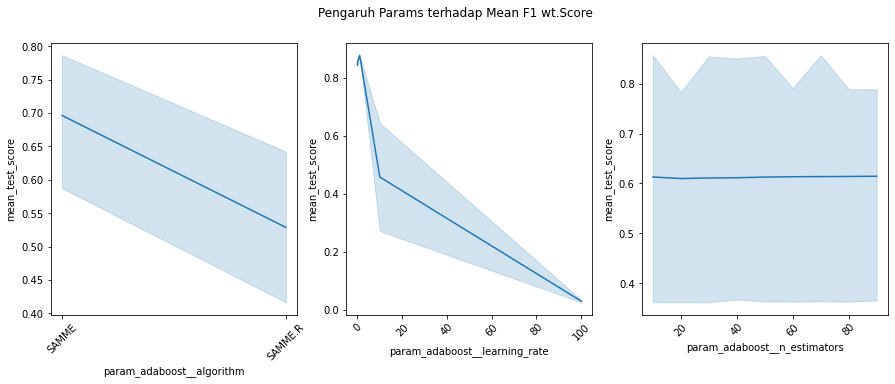

In [61]:
param_plot(df_result_adaboost)

Dari tiga parameter pada tuning `AdaBoost`, ketiga-tiganya memiliki pengaruh terhadap `F1 weighted` score sebagai berikut:
- SAMME diidentifikasi lebih baik dibandingkan SAMME.R
- Pada nilai learning rate rendah masih terjadi kenaikan test score, tetapi setelah menyentuh nilai tertentu, test score akan terus menurun
- Kenaikan jumlah estimator tidak sejalan dengan nilai test score

Berikut classification report dan confusion matrix yang dihasilkan dari train set.

In [62]:
print(classification_report(y_train,best_pipe_adaboost.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     29031
         1.0       0.68      0.20      0.31      3523

    accuracy                           0.90     32554
   macro avg       0.79      0.60      0.63     32554
weighted avg       0.89      0.90      0.88     32554



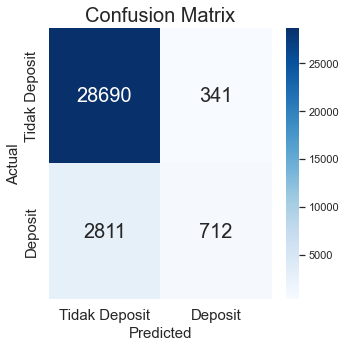

In [63]:
cf_graph(best_pipe_adaboost,X_train,y_train)

Dari classification report dan confusion matrix diketahui bahwa model dapat memprediksi ketika seorang client tidak membuat deposit dengan sangat akurat. Tetapi ketika memprediksi seseorang membuat deposit, masih banyak prediksi yang salah. Hal ini disebabkan oleh jumlah kelas yang imbalance pada target.

### 8.3. Evaluate Test Set

Gunakan best pipeline yang telah dibuat untuk memprediksi test set.

In [64]:
#uji fit
print('F1 weighted score Train:',f1_score(y_train, best_pipe_adaboost.predict(X_train), average='weighted'))
print('F1 weighted score Test:',f1_score(y_test, best_pipe_adaboost.predict(X_test), average='weighted'))

F1 weighted score Train: 0.8790202938736359
F1 weighted score Test: 0.8751879665572595


Hasil prediksi dari test set cukup akurat dengan nilai yang sedikit lebih kecil dibandingkan dengan train set. Model dapat dikatakan `Good Fit`.

## 9. Model Inference

Lakukan inference menggunakan inference set.

In [65]:
df_inf['y-pred'] = best_pipe_adaboost.predict(df_inf)
df_inf['y-pred']

1260     0.0
9721     0.0
40943    1.0
Name: y-pred, dtype: float64

Model berhasil memprediksi menggunakan data dari inference set melalui `best_pipe_adaboost`.

## 10. Pengambilan Kesimpulan

Berdasarkan analisis yang telah dilakukan, berikut beberapa hal yang disimpulkan:
1. Feature yang digunakan adalah:
    - `age`
    - `campaign`
    - `emp.var.rate`
    - `cons.conf.idx`
    - `job`
    - `education`
    - `month`
    - `marital`
    - `default`
    - `housing`
    - `loan`
    - `contact`
    - `day_of_week`
    - `poutcome`
2. Model yang terpilih berdasarkan `Cross Validation` adalah `AdaBoost` dengan hyperparameter terbaik yaitu:
    - `n_estimators` = 90
    - `learning_rate` = 1
    - `algorithm` = 'SAMME.R'
3. Model yang dihasilkan dapat memprediksi `Tidak Deposit` dengan sangat baik, tetapi belum bisa memprediksi `Deposit` dengan baik karena target-nya imbalance (rasio 8:1 untuk `Tidak Deposit`:`Deposit`)
4. Model yang dihasilkan `Good Fit` antara train set (F1 score 0.879) dan test set (F1 score 0.875)